Chris Hinckley

In [244]:
%reload_ext rpy2.ipython

In [245]:
%%R
# Company_data contains amounts spent on different types of advertisements and the resulting Sales
companyDF <- read.csv(url("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv"), header=T)
head(companyDF, 10)


      TV Radio Newspaper Sales
1  230.1  37.8      69.2  22.1
2   44.5  39.3      45.1  10.4
3   17.2  45.9      69.3  12.0
4  151.5  41.3      58.5  16.5
5  180.8  10.8      58.4  17.9
6    8.7  48.9      75.0   7.2
7   57.5  32.8      23.5  11.8
8  120.2  19.6      11.6  13.2
9    8.6   2.1       1.0   4.8
10 199.8   2.6      21.2  15.6


In [246]:
%%R
summary(companyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  


In [247]:
%%R
# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales

corr_matrix = cor(companyDF[-5], companyDF$Sales)

corr_matrix




               [,1]
TV        0.9012079
Radio     0.3496311
Newspaper 0.1579600
Sales     1.0000000


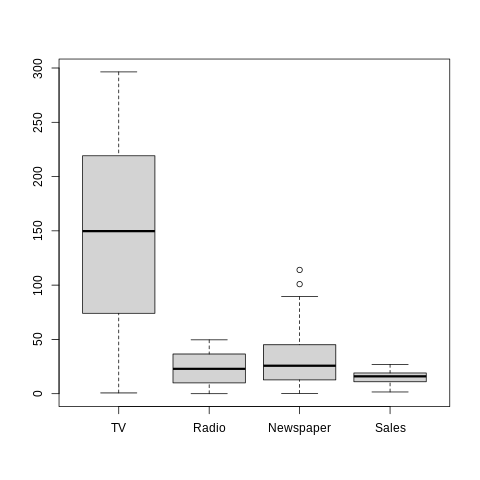

In [248]:
%%R
boxplot(companyDF)

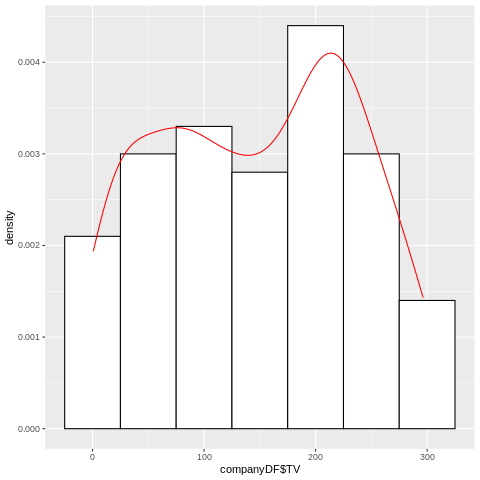

In [249]:
%%R
# plotting histogram and density estimates

library(ggplot2)
ggplot(data = companyDF, aes(x=companyDF$TV))  + geom_histogram(aes(y=..density..), binwidth=50, col = "black", fill = "white") + geom_density(aes(y=..density..), col = "red")

In [250]:
%%R
sum(is.na(companyDF))

[1] 0


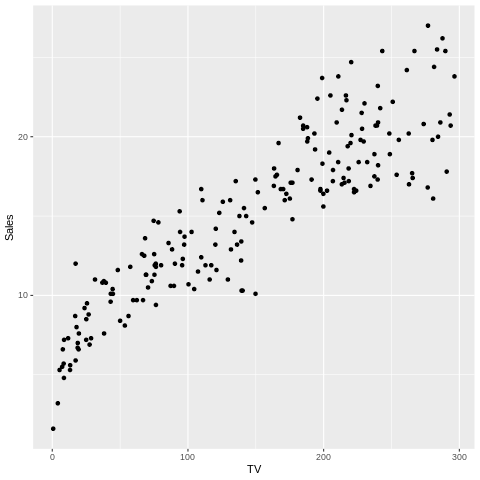

In [251]:
%%R
library(ggplot2)
ggplot(data = companyDF, mapping = aes(x = TV, y = Sales)) + geom_point()

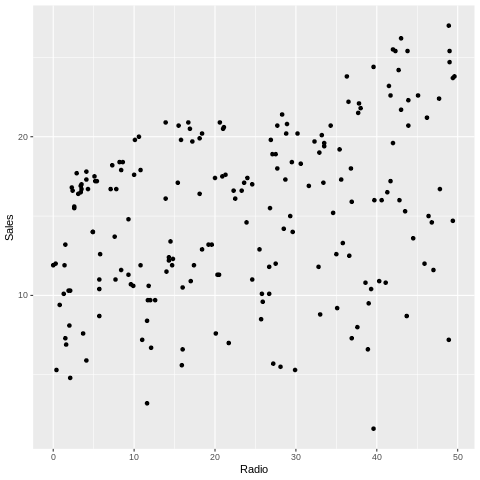

In [252]:
%%R
library(ggplot2)
ggplot(data = companyDF, mapping = aes(x = Radio, y = Sales)) + geom_point()

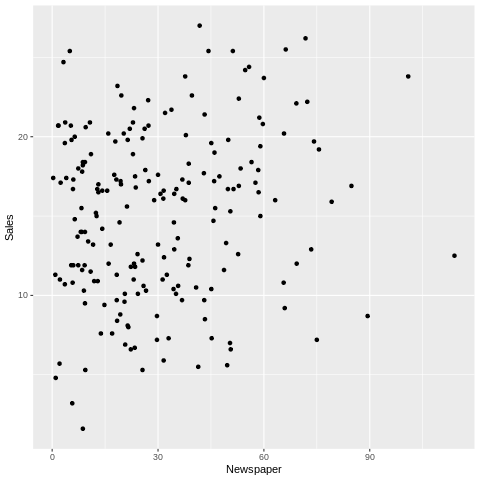

In [253]:
%%R
library(ggplot2)
ggplot(data = companyDF, mapping = aes(x = Newspaper, y = Sales)) + geom_point()

In [254]:
%%R
linear_model <- lm(companyDF$Sales ~ companyDF$TV)
linear_model


Call:
lm(formula = companyDF$Sales ~ companyDF$TV)

Coefficients:
 (Intercept)  companyDF$TV  
     6.97482       0.05546  



In [255]:
%%R
r_squared <- summary(linear_model)$r.squared
r_squared

[1] 0.8121757


In [256]:
%%R
mean_squared_error <- mean((companyDF$Sales - predict(linear_model))^2)
mean_squared_error

[1] 5.217744


In [257]:
%%R
sample_size <- floor(0.7 * nrow(companyDF))
set.seed(37)
sample_company_data <- sample(seq_len(nrow(companyDF)), size = sample_size)
train <- companyDF[sample_company_data, ]
test <- companyDF[-sample_company_data, ]

In [258]:
%%R
train_linear_model <- lm(train$Sales ~ train$TV)
train_linear_model


Call:
lm(formula = train$Sales ~ train$TV)

Coefficients:
(Intercept)     train$TV  
    6.76752      0.05576  



In [259]:
%%R
r_squared_train <- summary(train_linear_model)$r.squared
r_squared_train

[1] 0.8166718


In [260]:
%%R
mean_squared_error <- mean((train$Sales - predict(train_linear_model, test))^2)
mean_squared_error

[1] 5.540331


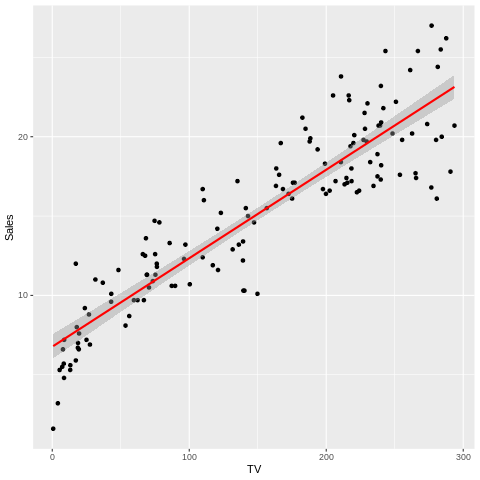

In [261]:
%%R
library(ggplot2)
ggplot(data = train, mapping = aes(x = TV, y = Sales)) + geom_point() + geom_smooth(method = "lm", formula = y~x, col = "red")

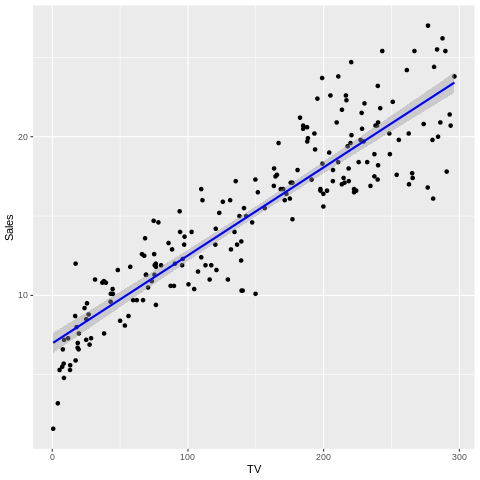

In [262]:
%%R
library(ggplot2)
ggplot(data = companyDF, mapping = aes(x = TV, y = Sales)) + geom_point() + geom_smooth(method = "lm", formula = y~x, col = "blue")

Recall the dataset contains amounts spent on different types of advertisements and the resulting Sales. Build the following linear models and plot the obtained MSE and R2 values for each model
a. Sales vs. TV
b. Sales vs. (TV, Radio, Newspaper)

In [265]:
%%R
#a was done above (Sales vs. TV)


linear_model <- lm(companyDF$Sales ~ companyDF$TV)
r_squared <- summary(linear_model)$r.squared
mean_squared_error <- mean((companyDF$Sales - predict(linear_model))^2)
print(linear_model)
print(r_squared)
print(mean_squared_error)


Call:
lm(formula = companyDF$Sales ~ companyDF$TV)

Coefficients:
 (Intercept)  companyDF$TV  
     6.97482       0.05546  

[1] 0.8121757
[1] 5.217744


In [266]:
%%R
#Sales vs. Radio

linear_model <- lm(companyDF$Sales ~ companyDF$Radio)
r_squared <- summary(linear_model)$r.squared
mean_squared_error <- mean((companyDF$Sales - predict(linear_model))^2)
print(linear_model)
print(r_squared)
print(mean_squared_error)


Call:
lm(formula = companyDF$Sales ~ companyDF$Radio)

Coefficients:
    (Intercept)  companyDF$Radio  
        12.2357           0.1244  

[1] 0.1222419
[1] 24.38405


In [268]:
%%R
#Sales vs. Newspaper
linear_model <- lm(companyDF$Sales ~ companyDF$Newspaper)
r_squared <- summary(linear_model)$r.squared
mean_squared_error <- mean((companyDF$Sales - predict(linear_model))^2)
print(linear_model)
print(r_squared)
print(mean_squared_error)


Call:
lm(formula = companyDF$Sales ~ companyDF$Newspaper)

Coefficients:
        (Intercept)  companyDF$Newspaper  
           13.95955              0.03832  

[1] 0.02495137
[1] 27.08677
